# Simulation discrète du modèle macroscopique


Ce code présente une validation du modèle microscopique proposé par Chevalier, Le Ny et Malhamé (2015) qui est ensuite généralisé à un modèle de jeu à champ moyen. Le modèle consiste à considérer que chaque conducteur règle sa vitesse par la maximisation d'une fonction d'utilité donné par 
$$f_i = v_i \left( 1 - F\left( \frac1N \sum_{j>i} w(x_j-x_i)\right)\right) -\frac12 \alpha v_i^2$$
où les conducteurs sont ordonnés de façon croissante (le conducteur 1 est derrière tout le monde).

On montrera l'application de ce modèle à un nombre de joueurs petit (N=2 et N=3)

In [1]:
# Importation des modules à utiliser
import numpy as np
import matplotlib.pyplot as plt

## Simulation pour deux joueurs

Dans ce cas-ci, les fonctions utilité sont:
$$ f_1 = v_1 \left( 1 - F\left( \frac12 w(x_2 - x_1)\right)\right) -\frac12 \alpha v_1^2 $$
$$ f_2 = v_2 - \frac12 v_2^2 $$

Par la suite, on considérera $F(x) = x$ et $w(y) = \frac1{\lambda}e^{-\frac{y}{\lambda}}$ avec $\lambda$ un paramètre que l'on précisera.

Notons que le conducteur 2 peut regler sa vitesse pour qu'elle soit maximale. Cela est cohérent avec le fait que les conducteurs ne prennent en compte que les conducteurs en avant. Ainsi, $v_2 = v_{max} = \frac1{\alpha}$.

Pour le joueur 1, la vitesse doit se calculer à chaque instant et est donnée par : 
$$v_1 = \frac1{\alpha}\left( 1 - \frac1{2\lambda}e^{-\frac{x_2 - x_1}{\lambda}}\right)$$

Text(0, 0.5, 'position (m)')

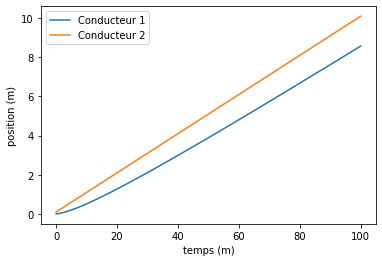

In [26]:
# Définition des paramètres de la simulation
T = 100
N = 1000
dt = T/N
alpha = 10
lda = 0.5 # paramètre lambda 
x1 = [0]
x2 = [0.1]
t = np.linspace(0,T,N+1)
v2max = 1/alpha

# Boucle
for i in range(N):
    v1 = 1/alpha * (1 - 1/(2*lda) * np.exp(-(x2[-1]-x1[-1])/lda))
    x2.append(x2[-1] + v2max * dt)
    x1.append(x1[-1] + v1 * dt)
    
# Plot
plt.plot(t,x1,label="Conducteur 1")
plt.plot(t,x2,label="Conducteur 2")
plt.legend()
plt.xlabel("temps (m)")
plt.ylabel("position (m)")